In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [276]:
import math
import pandas as pd
import random
import numpy as np

In [278]:
df = pd.read_csv('adult11.csv')
df = df.head(50)

Признак делаем бинарным потому как он странно представлен

In [280]:
df['salary_binary'] = df['salary'].map({'<=50K': 0, '>50K': 1})

Выбираем, по каким признакам будем определять

In [418]:
X = np.array(df[['age', 'hours-per-week', 'education-num']])
Y = np.array(df['salary_binary'])

Нормализация входных данных

In [447]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

Чтобы в функциях не повторять, вынесла все параметры

In [478]:
input_neurons = X.shape[1]  # Количество входных признаков
hidden_neurons = 5  # Количество нейронов в скрытом слое
output_neurons = 1  # Выходной слой
epochs = 5000
lr = 0.1

Сигмоида

In [481]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Производная сигмоиды

In [484]:
def sigmoid_derivative(x):
    return x * (1 - x)

Инициализация нейронной сети

In [499]:
def initialize_network(input_neurons, hidden_neurons, output_neurons):
    # Инициализация весов и смещений
    weights_hidden = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
    bias_hidden = np.random.uniform(-1, 1, hidden_neurons)
    weights_output = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
    bias_output = np.random.uniform(-1, 1, output_neurons)
    return weights_hidden, bias_hidden, weights_output, bias_output

Прямой проход

In [502]:
def forward_pass(X, weights_hidden, bias_hidden, weights_output, bias_output):
    hidden_input = np.dot(X, weights_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_output) + bias_output
    output = sigmoid(output_input)
    
    return hidden_output, output

Обратное распространение ошибки

In [505]:
def backward_pass(X, Y, hidden_output, output, weights_output, weights_hidden, bias_output, bias_hidden, lr):
    error = Y.reshape(-1, 1) - output

    # Градиент для выходного слоя
    output_gradient = error * sigmoid_derivative(output)

    # Градиент для скрытого слоя
    hidden_gradient = np.dot(output_gradient, weights_output.T) * sigmoid_derivative(hidden_output)

    # Обновление весов и смещений
    weights_output += lr * np.dot(hidden_output.T, output_gradient)
    bias_output += lr * np.sum(output_gradient, axis=0)

    weights_hidden += lr * np.dot(X.T, hidden_gradient)
    bias_hidden += lr * np.sum(hidden_gradient, axis=0)
    
    return weights_hidden, bias_hidden, weights_output, bias_output

Обучение нейросети

In [508]:
def train_neural_network(X, Y, input_neurons, hidden_neurons, output_neurons, epochs, lr):
    np.random.seed(1)
    
    # Инициализация весов и смещений
    weights_hidden = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
    bias_hidden = np.random.uniform(-1, 1, hidden_neurons)
    weights_output = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
    bias_output = np.random.uniform(-1, 1, output_neurons)
    
    # Обучение сети
    for epoch in range(epochs):
        hidden_output, output = forward_pass(X, weights_hidden, bias_hidden, weights_output, bias_output)
        weights_hidden, bias_hidden, weights_output, bias_output = backward_pass(
            X, Y, hidden_output, output, weights_output, weights_hidden, bias_output, bias_hidden, lr
        )
        if epoch % 1000 == 0:
            error = np.mean(np.square(Y.reshape(-1, 1) - output))
            print(f'Epoch {epoch}, Error: {error}')
    
    return weights_hidden, bias_hidden, weights_output, bias_output

Предсказания

In [511]:
def predict(X, weights_hidden, bias_hidden, weights_output, bias_output):
    _, output = forward_pass(X, weights_hidden, bias_hidden, weights_output, bias_output)
    return output

In [513]:
weights_hidden, bias_hidden, weights_output, bias_output = train_neural_network(X, Y, input_neurons, hidden_neurons, output_neurons, epochs, lr)

predictions = predict(X, weights_hidden, bias_hidden, weights_output, bias_output)
print("Предсказания:", predictions.flatten())

Epoch 0, Error: 0.5377348829818134
Epoch 1000, Error: 0.08420041301383385
Epoch 2000, Error: 0.06101993996099767
Epoch 3000, Error: 0.03446379568876373
Epoch 4000, Error: 0.025459083275736854
Предсказания: [4.66726522e-05 4.32886206e-02 7.90779348e-01 9.60153542e-01
 1.55381210e-02 4.56899350e-05 1.28955600e-04 9.29367349e-01
 3.09620474e-02 6.72448829e-08 4.95515507e-01 5.17879029e-01
 1.10713782e-04 6.58711271e-02 9.60262302e-01 9.99867060e-01
 2.35087875e-02 6.47228634e-05 8.81420935e-04 9.99871506e-01
 9.18404952e-01 2.49690932e-02 4.80837603e-07 7.29931579e-02
 2.01240032e-01 8.87467586e-01 2.18791950e-03 4.72976023e-04
 3.21924002e-02 3.56882103e-02 9.69764871e-01 1.67293669e-02
 5.28075908e-02 2.84357826e-02 1.17156492e-04 4.95515507e-01
 5.17879029e-01 4.64142110e-05 4.64348042e-05 1.04782350e-04
 9.26420950e-01 9.99063400e-01 1.95724790e-04 4.66883073e-05
 1.29702581e-02 9.32684482e-01 4.19244655e-05 5.81285927e-02
 8.51885782e-08 5.68535449e-02]


In [515]:
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)

[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


тут проверочка почему числа такие отвратительные(сам код работает, но для данного датафрейма не особенно)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

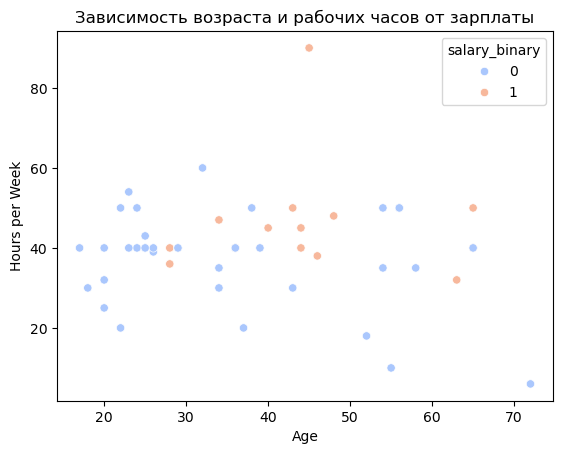

In [35]:
sns.scatterplot(x='age', y='hours-per-week', hue='salary_binary', data=df, palette='coolwarm')
plt.title('Зависимость возраста и рабочих часов от зарплаты')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()